# Submodule 4: Analyze Phylogenetic Tree

# Learning Objectives:
In submodule 4 we will be anlyzing phylogenetic trees constructed in previous submodule (submodule 3) that includes following steps:
- Comparative metagenomics from the tree
- Ancestral tree reconstruction

----------------------------------------------------------------------------------------------------------------
# Training Plan 


Submodule #1: Understanding the Basics of Phylogenetic

Submodule #2: Collect and Prepare Sequence Data and Analysis

Submodule #3: Construct Phylogenetic Tree

 
<font color="green"> **Submodule #4: Analyze Phylogenetic Tree** </font>

### 4.1 Interpret and Visually Represent Phylogenetic Trees:

Visualization tools are essential for interpreting and presenting phylogenetic trees.

**Tools for Tree Visualization:**

- iTOL (Interactive Tree of Life): An online tool for the display and annotation of phylogenetic trees.
    - Upload the seq_output.nwk file: iTOL Up: https://itol.embl.de/upload.cgi
    - Visualize and customize your phylogenetic tree as needed.

- IQ-TREE: A powerful software for phylogenetic analysis that can also visualize trees.


In [17]:
!conda install -c bioconda iqtree -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 24.9.1

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.9.1



## Package Plan ##

  environment location: /home/ec2-user/anaconda3/envs/python3

  added / updated specs:
    - iqtree


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    iqtree-2.3.6               |       hdbdd923_0         4.0 MB  bioconda
    ------------------------------------------------------------
                                           Total:         4.0 MB

The following NEW packages will be INSTALLED:

  iqtree             bioconda/linux-64::iqtree-2.3.6-hdbdd923_0 



                                                                                
Preparing tran

In [18]:
!find $CONDA_PREFIX -name "iqtree"

/home/ec2-user/anaconda3/envs/python3/bin/iqtree


In [19]:
import subprocess

# Run IQ-TREE
subprocess.run(["iqtree", "-s", "aligned_subset_augur.fasta", "-m", "TEST", "-bb", "1000", "-alrt", "1000", "-nt", "AUTO"])

IQ-TREE multicore version 2.3.6 for Linux x86 64-bit built Aug  4 2024
Developed by Bui Quang Minh, Nguyen Lam Tung, Olga Chernomor, Heiko Schmidt,
Dominik Schrempf, Michael Woodhams, Ly Trong Nhan, Thomas Wong

Host:    ip-172-16-49-241.ec2.internal (AVX512, FMA3, 30 GB RAM)
Command: iqtree -s aligned_subset_augur.fasta -m TEST -bb 1000 -alrt 1000 -nt AUTO
Seed:    832661 (Using SPRNG - Scalable Parallel Random Number Generator)
Time:    Wed Oct  9 01:06:34 2024
Kernel:  AVX+FMA - auto-detect threads (8 CPU cores detected)

Reading alignment file aligned_subset_augur.fasta ... Fasta format detected
Reading fasta file: done in 0.00557399 secs using 20.33% CPU
Alignment most likely contains DNA/RNA sequences
Alignment has 10 sequences with 29913 columns, 188 distinct patterns
101 parsimony-informative, 131 singleton sites, 29681 constant sites
                                         Gap/Ambiguity  Composition  p-value
Analyzing sequences: done in 6.38962e-05 secs using 575.9% CPU
   1 

Computing log-likelihood of 91 initial trees ... 0.033 seconds
Current best score: -42647.468

Do NNI search on 20 best initial trees
Estimate model parameters (epsilon = 0.100)
BETTER TREE FOUND at iteration 1: -42647.453
UPDATE BEST LOG-LIKELIHOOD: -42647.453
UPDATE BEST LOG-LIKELIHOOD: -42647.453
Iteration 10 / LogL: -42648.025 / Time: 0h:0m:23s
Iteration 20 / LogL: -42647.476 / Time: 0h:0m:23s
Finish initializing candidate tree set (2)
Current best tree score: -42647.453 / CPU time: 0.144
Number of iterations: 20
--------------------------------------------------------------------
|               OPTIMIZING CANDIDATE TREE SET                      |
--------------------------------------------------------------------
UPDATE BEST LOG-LIKELIHOOD: -42647.453
Iteration 30 / LogL: -42647.991 / Time: 0h:0m:23s (0h:0m:0s left)
UPDATE BEST LOG-LIKELIHOOD: -42647.452
UPDATE BEST LOG-LIKELIHOOD: -42647.452
Iteration 40 / LogL: -42647.991 / Time: 0h:0m:23s (0h:0m:0s left)
Iteration 50 / LogL: 

CompletedProcess(args=['iqtree', '-s', 'aligned_subset_augur.fasta', '-m', 'TEST', '-bb', '1000', '-alrt', '1000', '-nt', 'AUTO'], returncode=0)

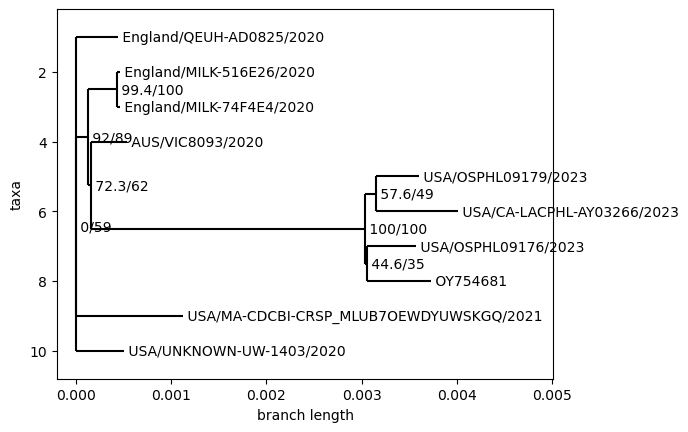

In [20]:
from Bio import Phylo
import matplotlib.pyplot as plt

# Load the Newick tree
tree = Phylo.read("aligned_subset_augur.fasta.treefile", "newick")

# Draw the tree
Phylo.draw(tree)
plt.show()

### 4.2 Importance of Visual Representation
**Visual representation of phylogenetic trees aids in:**
- Interpreting Results: Makes it easier to understand evolutionary relationships.
- Communication: Helps in conveying findings to a broader audience, including those who may not be specialists in phylogenetics.
- Highlighting Key Features: Emphasizes important evolutionary events and patterns.

### 4.3 Conduct Comparative Metagenomics along Different Branches
Comparative metagenomics involves comparing the genetic content of different samples to uncover variations.
Steps for Comparative Metagenomics:

1.	Installing BLAST:
 - Install BLAST using conda:

In [1]:
!conda install -c bioconda blast -y

Retrieving notices: ...working... done
Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/noarch::autopep8==2.0.4=pyhd8ed1ab_0
  - conda-forge/linux-64::black==24.4.2=py310hff52083_0
  - conda-forge/noarch::bleach==6.1.0=pyhd8ed1ab_0
  - conda-forge/noarch::plotly==5.23.0=pyhd8ed1ab_0
  - conda-forge/noarch::pytest==8.3.2=pyhd8ed1ab_0
  - conda-forge/noarch::qtpy==2.4.1=pyhd8ed1ab_0
  - conda-forge/linux-64::sip==6.7.12=py310hc6cd4ac_0
  - conda-forge/noarch::flask==3.0.3=pyhd8ed1ab_0
  - conda-forge/noarch::importlib_metadata==8.2.0=hd8ed1ab_0
  - conda-forge/noarch::lazy_loader==0.4=pyhd8ed1ab_0
  - conda-forge/linux-64::pyqt5-sip==12.12.2=py310hc6cd4ac_5
  - conda-forge/noarch::pytoolconfig==1.2.5=pyhd8ed1ab_0
  - conda-forge/noarch::qdarkstyle==3.1=pyhd8ed1ab_0
  - conda-forge/noarch::qtawesome==1.3.1=pyh9208f05_0
  - conda-forge/noarch::yapf==0.40.1=pyhd8ed1ab_0
  -

botocore-1.35.35     | 6.9 MB    | #####6                                |  15% [A



entrez-direct-22.4   | 14.0 MB   | 8                                     |   2% 
perl-list-moreutils- | 32 KB     | ##################6                   |  50% 




perl-common-sense-3. | 13 KB     | ##################################### | 100% 





perl-pathtools-3.75  | 42 KB     | ##############                        |  38% 

perl-types-serialise | 13 KB     | ##################################### | 100% 

botocore-1.35.35     | 6.9 MB    | ############5                         |  34% 



entrez-direct-22.4   | 14.0 MB   | ###7                                  |  10% 






importlib_metadata-8 | 9 KB      | ##################################### | 100% 


perl-compress-raw-zl | 75 KB     | ##################################### | 100% 







perl-archive-tar-2.4 | 33 KB     | #################8                    |  48% 


perl-compress-raw-zl | 75 KB     | ##################################### 

perl-json-4.10       | 56 KB     | ##################################### | 100% 



















perl-json-4.10       | 56 KB     | ##################################### | 100% 
















perl-io-compress-2.2 | 84 KB     | ##################################### | 100% 
















perl-io-compress-2.2 | 84 KB     | ##################################### | 100% 


















ncbi-vdb-3.1.1       | 10.7 MB   | #############5                        |  37% 












perl-5.32.1          | 12.7 MB   | #################                     |  46% 



entrez-direct-22.4   | 14.0 MB   | ########################3             |  66% 

















rpsbproc-0.5.0       | 6.1 MB    | #################################7    |  91% 





















perl-carp-1.38       | 17 KB     | ###################################4  |  96% 


















ncbi-vdb-3.1.1       | 10.7 MB   | #################2                    |  47% 












perl-5.32.1          | 12.7 MB   | ###

In [ ]:
!conda update -n base -c conda-forge conda

Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/linux-64::python==3.10.12=hd12c33a_0_cpython
  - conda-forge/noarch::boltons==23.0.0=pyhd8ed1ab_0
  - conda-forge/linux-64::brotli-python==1.1.0=py310hc6cd4ac_0
  - conda-forge/noarch::charset-normalizer==3.2.0=pyhd8ed1ab_0
  - conda-forge/noarch::colorama==0.4.6=pyhd8ed1ab_0
  - conda-forge/noarch::jsonpointer==2.0=py_0
  - conda-forge/noarch::pysocks==1.7.1=pyha2e5f31_6
  - conda-forge/linux-64::ruamel.yaml.clib==0.2.7=py310h1fa729e_1
  - conda-forge/noarch::jsonpatch==1.32=pyhd8ed1ab_0
  - conda-forge/linux-64::ruamel.yaml==0.17.32=py310h2372a71_0
  - conda-forge/linux-64::zstandard==0.19.0=py310h5764c6d_0
  - conda-forge/noarch::conda-package-streaming==0.9.0=pyhd8ed1ab_0
  - conda-forge/noarch::conda-package-h

| 

2. Creating a BLAST Database:
- Create a BLAST database from your sequence file:

In [2]:
%pwd

'/home/ec2-user/SageMaker/nosi-phylogenetic-tree'

In [3]:
%cd data/cov/

/home/ec2-user/SageMaker/nosi-phylogenetic-tree/data/cov


In [4]:
%pwd

'/home/ec2-user/SageMaker/nosi-phylogenetic-tree/data/cov'

In [5]:
!makeblastdb -in sequences_subset.fasta -dbtype nucl -out seq_database



Building a new DB, current time: 10/09/2024 00:17:47
New DB name:   /home/ec2-user/SageMaker/nosi-phylogenetic-tree/data/cov/seq_database
New DB title:  sequences_subset.fasta
Sequence type: Nucleotide
Keep MBits: T
Maximum file size: 3000000000B
Adding sequences from FASTA; added 10 sequences in 0.00586009 seconds.




3. Running BLAST:
- Create a new file query_seq.fasta with the sequences you want to compare.
- Run BLAST to compare your query sequences against the database:
- The results will be saved in seq_results.txt.

In [7]:
!blastn -query query_seq.fasta -db seq_database -out seq_results.txt -outfmt 6

### 4.4 Automate Comparative Metagenomics Analysis using Biopython
Automation can streamline comparative metagenomics analysis, making it more efficient.

**Script for Automation:**

In [8]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 56.7 MB/s eta 0:00:0000:01


In [9]:
from Bio.Blast import NCBIWWW, NCBIXML

# Function to run BLAST and parse results
def run_blast(query_file, db_file, output_file):
    result_handle = NCBIWWW.qblast("blastn", db_file, query_file)
    with open(output_file, "w") as out_handle:
        out_handle.write(result_handle.read())
    result_handle.close()

# Run the BLAST
run_blast("query_seq.fasta", "seq_database", "blast_results.xml")

# Parse the BLAST results
with open("blast_results.xml") as result_handle:
    blast_records = NCBIXML.parse(result_handle)
    for blast_record in blast_records:
        for alignment in blast_record.alignments:
            for hsp in alignment.hsps:
                print(f"****Alignment****")
                print(f"sequence: {alignment.title}")
                print(f"length: {alignment.length}")
                print(f"e value: {hsp.expect}")
                print(f"{hsp.query[0:75]}...")
                print(f"{hsp.match[0:75]}...")
                print(f"{hsp.sbjct[0:75]}...")


### 4.5 Discuss Insights from Ancestral State Reconstruction
Ancestral state reconstruction provides insights into:
- Evolutionary Dynamics: Understanding how certain traits or genetic sequences have evolved over time.
- Diversity: Gaining a deeper understanding of the diversity within and between metagenomic samples.
- Evolutionary Pressures: Identifying the evolutionary pressures that have shaped the genetic makeup of organisms.


### 4.6 Utilize Bayesian Inference Methods with BEAST for Ancestral State Reconstruction
Bayesian inference methods are powerful for reconstructing ancestral states and understanding evolutionary dynamics.

**Using BEAST for Ancestral State Reconstruction:**

1.	Installing BEAST:
- Install BEAST using conda:

In [10]:
!conda install -c bioconda beast -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 24.9.1

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.9.1



## Package Plan ##

  environment location: /home/ec2-user/anaconda3/envs/python3

  added / updated specs:
    - beast


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    beagle-lib-4.0.1           |       h4ac6f70_1         1.9 MB  bioconda
    beast-1.10.4               |       hdfd78af_2        14.7 MB  bioconda
    openjdk-22.0.1             |       h8651b0f_1       173.3 MB  conda-forge
    ------------------------------------------------------------
                                           Total:       189.9 MB

The following NEW packages will be INSTALLED:

  beagle-li

- You can check the installation and available options with:

In [11]:
!beast -beagle_info


        BEAST v1.10.4 Prerelease #bc6cbd9, 2002-2018
       Bayesian Evolutionary Analysis Sampling Trees
                 Designed and developed by
   Alexei J. Drummond, Andrew Rambaut and Marc A. Suchard
                              
               Department of Computer Science
                   University of Auckland
                  alexei@cs.auckland.ac.nz
                              
             Institute of Evolutionary Biology
                  University of Edinburgh
                     a.rambaut@ed.ac.uk
                              
              David Geffen School of Medicine
           University of California, Los Angeles
                     msuchard@ucla.edu
                              
                Downloads, Help & Resources:
                  	http://beast.community
                              
Source code distributed under the GNU Lesser General Public License:
          	http://github.com/beast-dev/beast-mcmc
                              
      

2.	Launching BEAUti:
- Find the path to the BEAUti software:

In [12]:
!find $CONDA_PREFIX -name "beauti"

/home/ec2-user/anaconda3/envs/python3/bin/beauti


- Open BEAUti by running the found path in your command line.
    - Example:
        - /path/to/bin/beauti

3.	Using BEAUti:
- In BEAUti, go to File > Import and load your aligned_sequences.fasta.
- Set up the parameters for your analysis and generate the BEAST XML file.
- Save the configuration as seq_config.xml.
4.	Running BEAST:
- Run BEAST with the configuration file:


In [ ]:
!beast seq_config.xml


        BEAST v1.10.4 Prerelease #bc6cbd9, 2002-2018
       Bayesian Evolutionary Analysis Sampling Trees
                 Designed and developed by
   Alexei J. Drummond, Andrew Rambaut and Marc A. Suchard
                              
               Department of Computer Science
                   University of Auckland
                  alexei@cs.auckland.ac.nz
                              
             Institute of Evolutionary Biology
                  University of Edinburgh
                     a.rambaut@ed.ac.uk
                              
              David Geffen School of Medicine
           University of California, Los Angeles
                     msuchard@ucla.edu
                              
                Downloads, Help & Resources:
                  	http://beast.community
                              
Source code distributed under the GNU Lesser General Public License:
          	http://github.com/beast-dev/beast-mcmc
                              
      